Starter code for Artificial Neural Network (ANN) assignment. If you have any question, please contact the instructor and TAs for clarification.

In [2]:
import pandas as pd
from google.colab import files
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

uploaded = files.upload()

Saving data_3dim.csv to data_3dim.csv


In [3]:
# Read the csv file
data_set = pd.read_csv("data_3dim.csv")

In [4]:
# Take a look at the data
data_set

,Router1,Router2,Router3,RoomLabel
0,-56,-61,-71,1
1,-57,-61,-71,1
2,-60,-60,-76,1
3,-60,-68,-77,1
4,-65,-60,-77,1
...,...,...,...,...
995,-60,-56,-85,0
996,-56,-55,-63,0
997,-57,-56,-64,0
998,-57,-55,-65,0


In [5]:
# Convert to numpy array
data_set = data_set.to_numpy()

# Split into training set and validation set
train_set, valid_set = train_test_split(data_set, test_size=0.2, random_state=2)

# Scale the data
# You can try standard scaler instead if you want
min_max_scaler = preprocessing.MinMaxScaler()
train_set = min_max_scaler.fit_transform(train_set)
valid_set = min_max_scaler.fit_transform(valid_set)

In [6]:
# Preview the processed training data
pd.DataFrame(train_set)

,0,1,2,3
0,0.678571,0.555556,0.424242,1.0
1,0.714286,0.481481,0.575758,1.0
2,0.678571,0.777778,0.545455,0.0
3,0.607143,0.814815,0.545455,0.0
4,0.714286,0.777778,0.454545,1.0
...,...,...,...,...
795,0.642857,0.629630,0.696970,0.0
796,0.571429,0.592593,0.484848,0.0
797,0.642857,0.555556,0.696970,0.0
798,0.535714,0.592593,0.575758,0.0


In [7]:
# Preview the processed validation data
pd.DataFrame(valid_set)

,0,1,2,3
0,0.363636,0.125000,0.115385,1.0
1,0.681818,0.750000,0.769231,0.0
2,0.590909,0.166667,0.346154,1.0
3,0.454545,0.416667,0.692308,1.0
4,0.545455,0.708333,0.576923,0.0
...,...,...,...,...
195,0.545455,0.250000,0.384615,1.0
196,0.727273,0.625000,0.692308,1.0
197,0.681818,0.375000,0.500000,0.0
198,0.727273,0.875000,0.807692,0.0


In [8]:
# Split into features and labels
train_x,train_y = train_set[:,0:3], train_set[:,3]
valid_x,valid_y = valid_set[:,0:3], valid_set[:,3]

**Question 2(a)** (15 marks) Build an ANN which achieves validation accuracy of at least 75%. You can try various numbers of layers, numbers of neurons, and/or learning rate. Use your ANN to predict on the validation data valid_x, and show the validation accuracy.

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=50, validation_data=(valid_x, valid_y))

valid_acc = model.evaluate(valid_x, valid_y)[1]
print('Validation accuracy:', valid_acc)



Epoch 1/50
25/25 [==============================] - 1s 16ms/step - loss: 0.6826 - accuracy: 0.5125 - val_loss: 0.6730 - val_accuracy: 0.6000
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.6438 - val_loss: 0.6506 - val_accuracy: 0.7400
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.6825 - val_loss: 0.6209 - val_accuracy: 0.7500
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6151 - accuracy: 0.7375 - val_loss: 0.5977 - val_accuracy: 0.6850
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5929 - accuracy: 0.7275 - val_loss: 0.5602 - val_accuracy: 0.7350
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7500 - val_loss: 0.5407 - val_accuracy: 0.7350
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.7188 - val_loss: 0.5462 - val_accuracy: 0.7350
Epoch 8/50
25/25 [=

**Question 2(b)** (5 marks) Build an ANN, train it for at least 15 epochs, and plot the validation accuracy after each iteration (epoch) as a bar chart. You can use the provided starter code for plotting. Use 0.001 as the learning rate.

In [15]:
# Your code here (you can use multiple cells)

epochs = 15
accuracies_ep = []
for epoch in range(epochs):
    history = model.fit(train_x, train_y, epochs=1, validation_data=(valid_x, valid_y), verbose=0)
    val_acc = history.history['val_accuracy'][0]
    accuracies_ep.append(val_acc)
    print(f"Epoch {epoch+1}: Validation accuracy = {val_acc:.3f}")


Epoch 1: Validation accuracy = 0.750
Epoch 2: Validation accuracy = 0.765
Epoch 3: Validation accuracy = 0.750
Epoch 4: Validation accuracy = 0.765
Epoch 5: Validation accuracy = 0.745
Epoch 6: Validation accuracy = 0.755
Epoch 7: Validation accuracy = 0.730
Epoch 8: Validation accuracy = 0.765
Epoch 9: Validation accuracy = 0.745
Epoch 10: Validation accuracy = 0.745
Epoch 11: Validation accuracy = 0.755
Epoch 12: Validation accuracy = 0.760
Epoch 13: Validation accuracy = 0.770
Epoch 14: Validation accuracy = 0.745
Epoch 15: Validation accuracy = 0.750


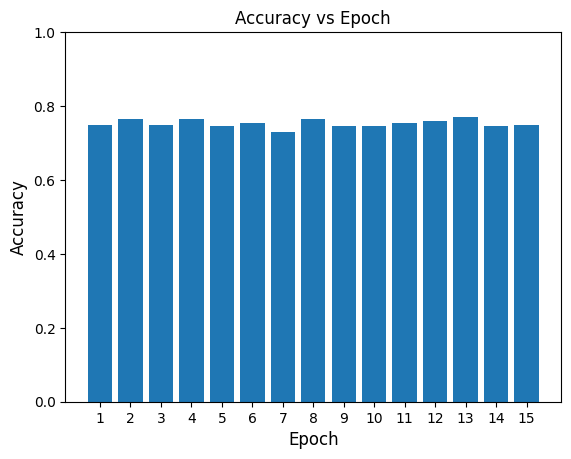

In [16]:
fig, ax = plt.subplots()
epochs_labels = [str(i+1) for i in range(epochs)]
ax.bar(epochs_labels, accuracies_ep)
ax.set_xlabel('Epoch',fontsize= 12)
ax.set_ylabel('Accuracy',fontsize= 12)
ax.set_title('Accuracy vs Epoch')
ax.set_ylim(top=1)
plt.show()

**Question 2(c)** (5 marks) Train an ANN using different learning rates: 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, but the same number of epochs (e.g., 15 epochs), predict on the validation data valid_x, and and plot validation accuracy versus learning rate as a bar chart. You can use the provided starter code for plotting.



In [17]:
# Your code here (you can use multiple cells)

lrs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]

# Train the model with different learning rates and collect the validation accuracies
accuracies_lr = []
for lr in lrs:
    model = models.Sequential([layers.Dense(64, activation='relu', input_shape=(3,)),layers.Dense(1, activation='sigmoid')])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

    num_epochs = 15
    history = model.fit(train_x, train_y, epochs=num_epochs, validation_data=(valid_x, valid_y), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    accuracies_lr.append(val_acc)
    print(f"Learning rate {lr}: Validation accuracy = {val_acc:.3f}")

Learning rate 0.0001: Validation accuracy = 0.690
Learning rate 0.001: Validation accuracy = 0.755
Learning rate 0.01: Validation accuracy = 0.740
Learning rate 0.1: Validation accuracy = 0.745
Learning rate 1: Validation accuracy = 0.525
Learning rate 10: Validation accuracy = 0.565
Learning rate 50: Validation accuracy = 0.475
Learning rate 100: Validation accuracy = 0.475


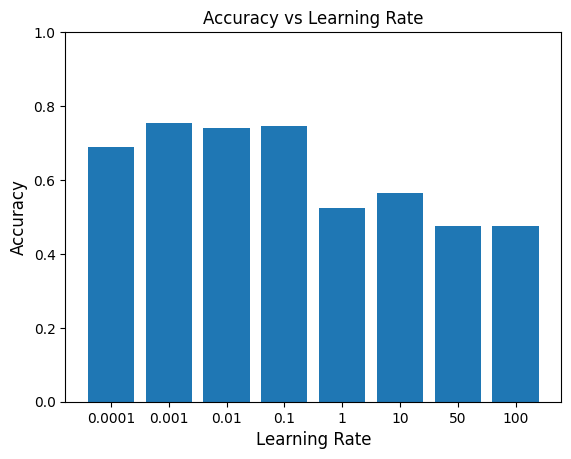

In [18]:
fig, ax = plt.subplots()
lr_labels = [str(lr) for lr in lrs]
ax.bar(lr_labels, accuracies_lr)
ax.set_xlabel('Learning Rate',fontsize= 12)
ax.set_ylabel('Accuracy',fontsize= 12)
ax.set_title('Accuracy vs Learning Rate')
ax.set_ylim(top=1)
plt.show()